# **Biblioteki**

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import warnings
import pingouin as pn
import scipy
from scipy.stats import bartlett
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.graphics.factorplots import interaction_plot
import pingouin as pg
from statsmodels.graphics.factorplots import interaction_plot

# **Wczytanie danych**

Przeprowadzono badanie oceniające różnice z satysfakcji z życia pomiędzy nastolatkami, młodymi, dorosłymi osobami w zależności od płci.

Dane do zadania: http://sigmaquality.pl/uncategorized/praktyczny-przyklad-wykorzystania-anova-two-way-w-pythonie-pl080120201039/


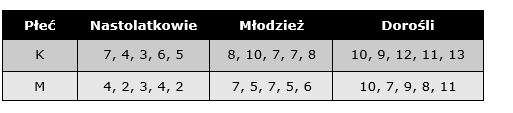

In [2]:
d = {'zadowolenie':[4, 2, 3, 4, 2, 7, 5, 7, 5, 6, 10, 7, 9, 8, 11, 7, 4, 3, 6, 5, 8, 10, 7, 7, 8, 10, 9, 12, 11, 13],
     'płeć':['M','M','M','M','M','M','M','M','M','M','M','M','M','M','M','K','K','K','K','K','K','K','K','K','K','K','K','K','K','K'],
     'wiek':['N', 'N', 'N', 'N', 'N', 'M', 'M', 'M', 'M', 'M', 'D', 'D', 'D', 'D', 'D','N', 'N', 'N', 'N', 'N', 'M', 'M', 'M', 'M', 'M', 'D', 'D', 'D', 'D', 'D']}

df = pd.DataFrame(data = d)


**Zadanie:**

Proszę wyznaczyć średnią i waraincję w każdej z 6 grup.

In [3]:
# grupa 1

K1 = df[(df['płeć'] == 'K') & (df['wiek'] == 'N')]

m_K1 = np.mean(K1['zadowolenie'])
v_K1 = np.var(K1['zadowolenie'])

print('srednia gr K1: ', m_K1)
print('wariancja gr K1: ', v_K1)

srednia gr K1:  5.0
wariancja gr K1:  2.0


In [6]:
# Rozwiązanie: grupa 2, grupa 3 .... grupa 6


<Axes: xlabel='wiek', ylabel='zadowolenie'>

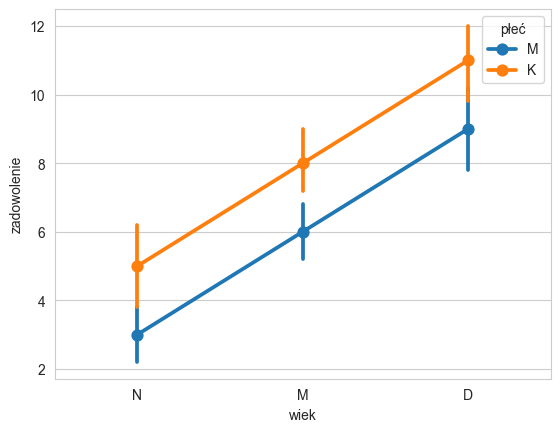

In [4]:
# Wizualizacja
sns.set_style('whitegrid')
sns.pointplot(data = df, x = 'wiek', y = 'zadowolenie', hue = 'płeć')

<Axes: xlabel='zadowolenie', ylabel='wiek'>

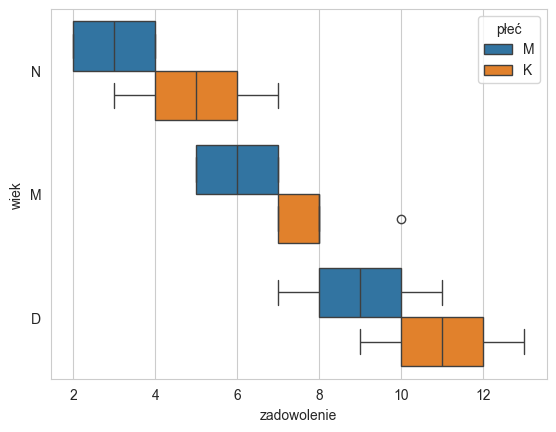

In [5]:
# boxplot
sns.set_style('whitegrid')
sns.boxplot(data = df, x = 'zadowolenie', y = 'wiek', hue = 'płeć')

# **ANOVA WIELOCZYNNIKOWA**

Analiza wariancji (ANOVA) bada wpływ dwóch lub większej ilości czynników  klasyfikujących (podzielonych na wiele poziomów) na wartości badanej cechy mierzalnej. W analizie tej należy rozpatrywać wpływ każdego czynnika z osobna oraz wpływ wspólny czynników na zmienność cechy mierzalnej.

Hipotezy:

HOA: Źródło zmienności A nie różnicuje wyników.

HOB: Źródło zmienności B nie różnicuje wyników.

H0AB: Źródło zmienności AB nie różnicuje wyników.

**Zadanie:**

Proszę sprawdzić czy wiek oraz płeć wpływają na poziom zadowolenia z życia.

**Hipotezy:**

H0A: Wiek nie wpływa na poziom zadowolenia z życia

H0B: Płeć nie wpływa na poziom zadowolenia z życia

H0AB: Źródło zmienności płeć i wiek nie różnicuje wyników.

**Proszę sformułować hipotezy alternatywne:**

H1A:

H1B:

H1AB:

## **Założenia**

**Podstawowe założenia ANOVY dwuczynnikowej:**

- populacje, z których pobrano próbki, muszą mieć rozkład normalny lub w przybliżeniu normalny,
- próbki znajdujace się w poszczególnych grupach muszą być niezależne,
- wariancje populacji muszą być równe,
- grupy muszą mieć tę samą wielkość próby.

Grupy są równoliczne i niezależne.

**Testy wskazują we wszystkich 6 grupach, że nie można odrzucić H0 mówiącej o tym, że rozkład jest rozkładem normalnym.**



**Jednorodnośc wariancji**

między wszystkimi 6 grupami

**H0:**

**H1:**

In [11]:
# Rozwiązanie

# zadowolenie
# wiek
# płeć
model = ols('zadowolenie ~ C(wiek) + C(płeć) + C(wiek): C(płeć)',data= df).fit()

anova_table = sms.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(wiek),1.800000e+02,2.0,4.909091e+01,3.299559e-09
C(płeć),3.000000e+01,1.0,1.636364e+01,4.700077e-04
C(wiek):C(płeć),3.944305e-30,2.0,1.075719e-30,1.000000e+00
Residual,4.400000e+01,24.0,NaN,NaN


**ODP:**

**WYKONANIE TESTU ANOVA**

W Pythonie mamy dwie możliwości wykonania testu ANOVA

1) **Z wykorzytsaniem biblioteki statsmodels**

https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html


Funkcja ols() z pliku statsmodels.formula.api, umożliwia sprawdzenie wpływu wybranych zmiennych kategorycznych (cecha A i cecha B) oraz efektu ich interakcji na zmienną zależną (cecha C).

model = ols('cecha C) ~ C(cecha A)) + C(cecha B) + C(cecha A): C(cecha B)) ',data= zbior danych).fit()

anova_table = sms.anova_lm(model, typ=2)

zmienna typ - typ testu ANOVA

2) **Z wykorzystaniem biblioteki pingouin**

https://pingouin-stats.org/build/html/generated/pingouin.anova.html

aov = pg.anova(df, dv='cecha C', between=['cecha A', 'cecha B'], detailed=True)

Proszę skomentować wyniki.


In [12]:
# Metoda 1

model = ols('zadowolenie ~ C(wiek) + C(płeć) + C(wiek):C(płeć)', data=df).fit()

anova_table = sms.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(wiek),1.800000e+02,2.0,4.909091e+01,3.299559e-09
C(płeć),3.000000e+01,1.0,1.636364e+01,4.700077e-04
C(wiek):C(płeć),3.944305e-30,2.0,1.075719e-30,1.000000e+00
Residual,4.400000e+01,24.0,NaN,NaN


In [13]:
# Metoda 2

aov = pg.anova(df, dv='zadowolenie', between=['wiek', 'płeć'], detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,wiek,180.0,2,90.000000,49.090909,3.299559e-09,0.803571
1,płeć,30.0,1,30.000000,16.363636,4.700077e-04,0.405405
2,wiek * płeć,0.0,2,0.000000,0.000000,1.000000e+00,0.000000
3,Residual,44.0,24,1.833333,NaN,NaN,NaN


**ODP:**

**TEST POST-HOC**

W przypadku wieku możemy przeprowadzić test POST-HOC w celu ustalenia między, którymi grupami zachodzą różnice, w przypadku płci mamy tylko dwie grupy, więc test ten nie ma sensu.

Proszę skomentować wyniki.

In [14]:
pw = model.t_test_pairwise('C(wiek)')
pw.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
M-D,-3.0,0.856349,-3.503245,1.827633e-03,-4.767417,-1.232583,3.651925e-03,True
N-D,-6.0,0.856349,-7.006490,3.034430e-07,-7.767417,-4.232583,9.103288e-07,True
N-M,-3.0,0.856349,-3.503245,1.827633e-03,-4.767417,-1.232583,3.651925e-03,True


**ODP.**

**WYKRES INTERAKCJI**

Jeżeli krzywe na wykresie interakcji są równoległe to wpływ poszczególnych źródeł zmienności jest niezależny (brak interakcji między czynnikami). Natomiast jeśli krzywe mają ISTOTNIE różne kąty nachylenia to możemy stwierdzić, że istnieje wpływ interakcji.

c:\Users\j.mazur\Documents\statystyka\.venv\Lib\site-packages\statsmodels\graphics\factorplots.py:113: FutureWarning: The provided callable <function mean at 0x000001E7670F4360> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  plot_data = data.groupby(['trace', 'x']).aggregate(func).reset_index()
c:\Users\j.mazur\Documents\statystyka\.venv\Lib\site-packages\statsmodels\graphics\factorplots.py:113: FutureWarning: The provided callable <function mean at 0x000001E7670F4360> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  plot_data = data.groupby(['trace', 'x']).aggregate(func).reset_index()


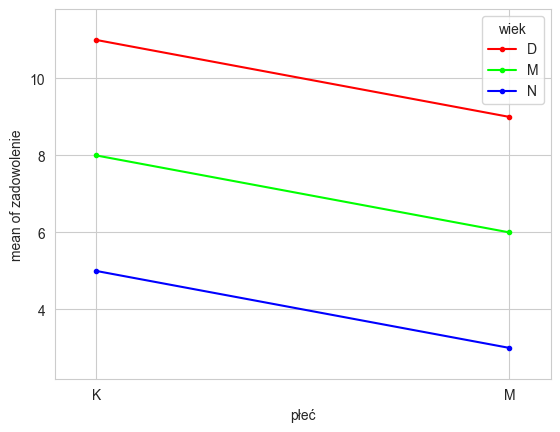

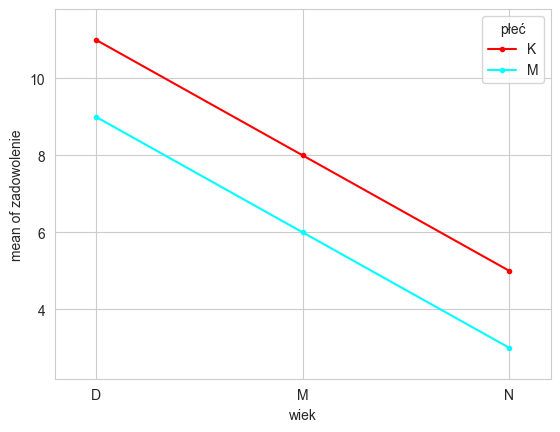

In [15]:
fig = interaction_plot(df.płeć, df.wiek, df.zadowolenie)
fig = interaction_plot(df.wiek, df.płeć, df.zadowolenie)

**INTERPRETACJA:**

**SIŁA EFEKTU**

Podstawową miarą siły efektu w ANOVIE dwuczynnikowej jest cząstkowe η^2.

Współczynnik ten informuje o tym jaki wpływ na zmienną zależną mają zmienne kategoryzujące.  Wynik można pomnożyć przez 100% w celu otrzymania wartości procentowej wyjaśnianej zmienności.

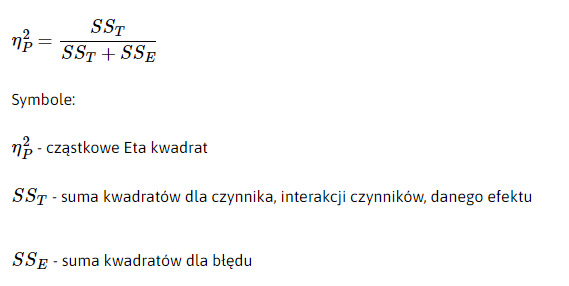

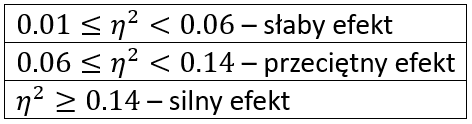

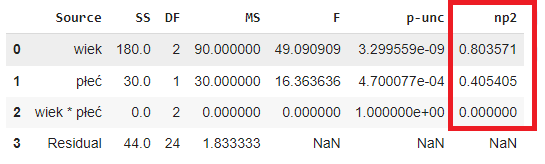

**Proszę zinterpretować wartości cząstkowych η^2.**

**ODP:**

**Zadanie**

Proszę sprawdzić czy lek oraz terapia wpływają na stan zdrowia.

Pacjentów z reumatoidalnym zapaleniem stawów poproszono o ogólną ocenę stanu zdrowia w skali od 0 do 100, gdzie 0 oznacza bardzo dobre samopoczucie, a 100 bardzo złe samopoczucie. Do badania włączono 30 pacjentów, którzy aktywność choroby oceniali w granicach 70-80.

Dane do zadania:

https://nauka.metodolog.pl/wielkosc-efektu-podstawowe-miary-szacujace-sile-zwiazkow-i-wplywow/

Grupy są równoliczne i niezależne.

**Testy wskazują we wszystkich grupach, że nie można odrzucić H0 mówiącej o tym, że rozkład jest rozkładem normalnym.**

In [16]:
d2 = {'stan': [60, 54, 88, 76, 73, 48, 73, 39, 35, 51, 43, 67, 53, 48, 49, 90, 87, 67, 55, 82, 56, 76, 62, 44, 52, 57, 75, 78, 64, 82], 'terapia': ["T", "T", "T", "T", "T", "T", "T", "T", "T", "T", "T", "T", "T", "T", "T", "N", "N", "N", "N", "N", "N", "N", "N", "N", "N", "N", "N", "N", "N", "N" ],
     'lek':["P", "P", "P", "P", "P", "L1", "L1", "L1", "L1", "L1", "L2", "L2", "L2", "L2", "L2", "P", "P", "P", "P", "P", "L1", "L1", "L1", "L1", "L1", "L2", "L2", "L2", "L2", "L2"]}
df2 = pd.DataFrame(data=d2)

<Axes: xlabel='lek', ylabel='stan'>

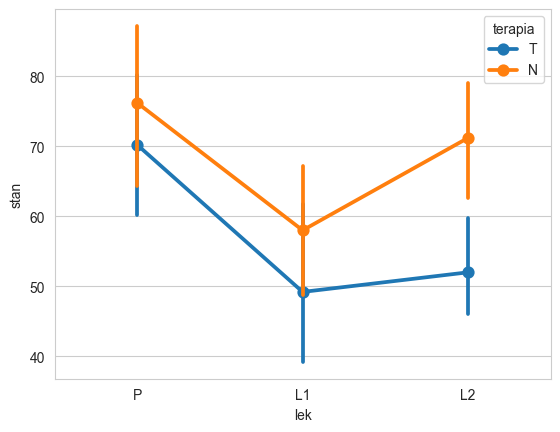

In [17]:
# Wizualizacja
sns.set_style('whitegrid')
sns.pointplot(data = df2, x = 'lek', y = 'stan', hue = 'terapia')

<Axes: xlabel='stan', ylabel='lek'>

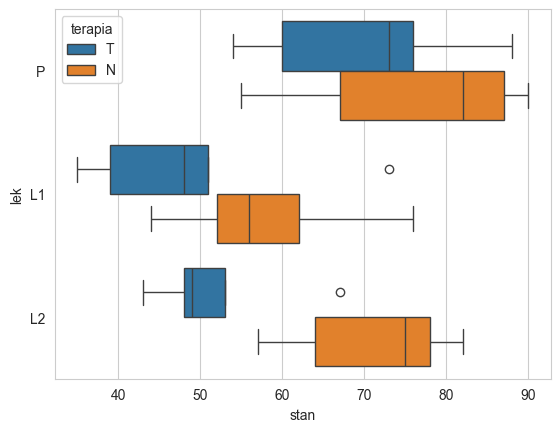

In [18]:
# boxplot
sns.set_style('whitegrid')
sns.boxplot(data = df2, x = 'stan', y = 'lek', hue = 'terapia')

In [20]:
aov = pg.anova(df2, dv='stan', between=['lek', 'terapia'], detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,lek,1942.400000,2,971.200000,6.109457,0.007167,0.337363
1,terapia,963.333333,1,963.333333,6.059971,0.021398,0.201596
2,lek * terapia,241.866667,2,120.933333,0.760746,0.478258,0.059616
3,Residual,3815.200000,24,158.966667,NaN,NaN,NaN


c:\Users\j.mazur\Documents\statystyka\.venv\Lib\site-packages\statsmodels\graphics\factorplots.py:113: FutureWarning: The provided callable <function mean at 0x000001E7670F4360> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  plot_data = data.groupby(['trace', 'x']).aggregate(func).reset_index()


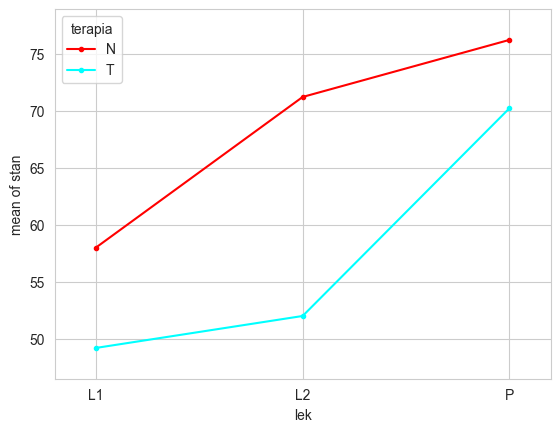

In [24]:
fig = interaction_plot(df2.lek, df2.terapia, df2.stan)